In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import warnings
from utils import ModelComparator, ModelEnsemble
from mlp import MLPClassifier
from xgboost import XGBClassifier
warnings.filterwarnings(action="ignore")

In [7]:
X = pd.read_table('x_train.txt', sep=" ", header=None)
X.columns = [str(i) for i in range(X.shape[1])]
y = pd.read_table('y_train.txt', header=None).to_numpy(dtype=np.int8).squeeze()

In [8]:
comparator = ModelComparator(X, y, n_splits=10)

# Initial results

In [4]:
from sklearn.linear_model import LogisticRegression

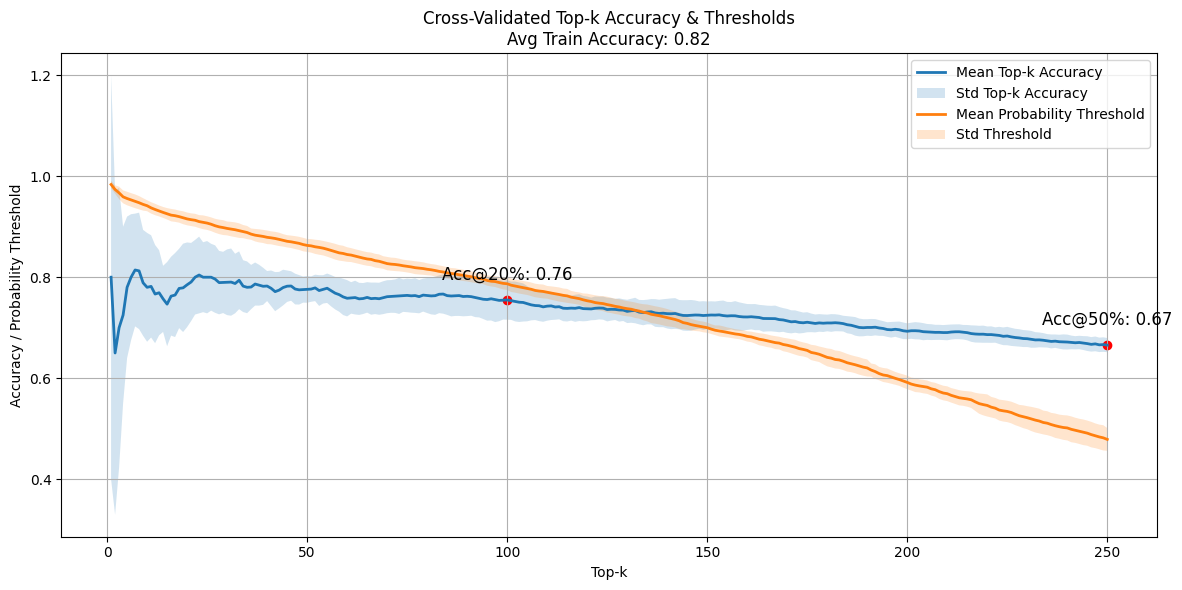

Test Accuracies (Overall): 0.68 ± 0.01


0.7534653465346534

In [ ]:
X = pd.read_table('mars_features_output.txt', sep=",", header=None)
comparator = ModelComparator(X, y, n_splits=10)
criterion = comparator.evaluate_model(XGBClassifier(),
                          None) # If None, calculates with all variables

### Example with custom MLP classifier

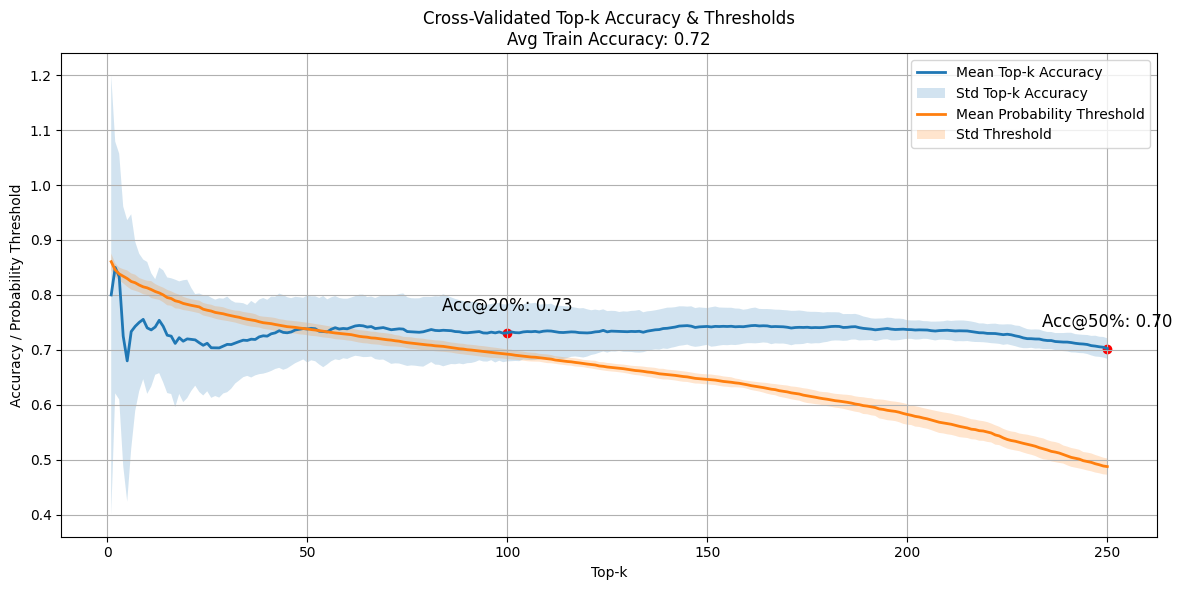

Test Accuracies (Overall): 0.72 ± 0.01


0.7326732673267325

In [6]:
model_mlp = MLPClassifier(epochs=10, lr=0.001, weight_decay=0, batch_size=64)

comparator.evaluate_model(model_mlp,
                          variables=[2, 81, 28, 209, 180, 414, 462, 300, 351, 425]) # This method also returns Acc@20%

### Example with an ensemble

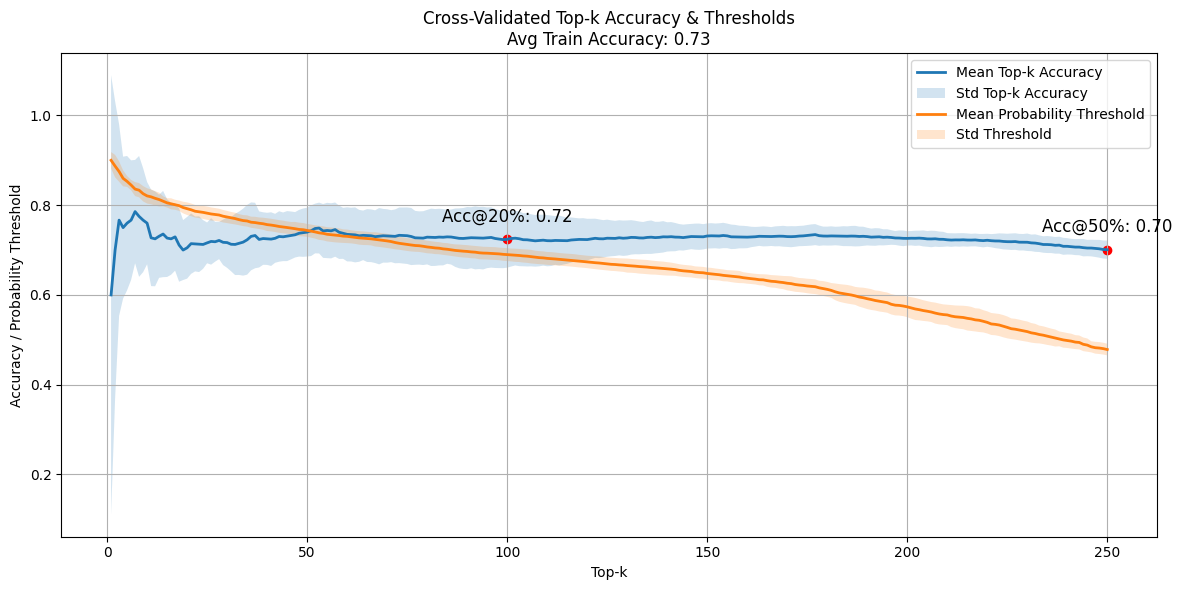

Test Accuracies (Overall): 0.71 ± 0.02


0.7257425742574256

In [ ]:
model_mlp = MLPClassifier(epochs=8, lr=0.002, weight_decay=0.0001, batch_size=64)
# xgb = XGBClassifier()
rf = RandomForestClassifier(n_estimators=20, criterion="entropy")
lr = LogisticRegression()

ensemble = ModelEnsemble(models=(rf, lr, model_mlp), voting="mean")



comparator.evaluate_model(ensemble,
                          variables=[2, 462, 351, 28]) # This method also returns Acc@20%

# Feature selection

Will be performed independently from original column names, for example: <br>
`Selected features = [0, 5, 440]` may in fact be `[1, 7, 468]` from original dataset

## VIF

Performed iteratively according to methodology:
1. calculate VIF of every variable and choose those with `VIF > 5`
2. Among those found in point 1, remove this variable with **lowest** Mutual Information Score (with relation to target `y`)

In [4]:
# Only results of this method provided (it is computationally expensive)
from utils import VIF_SELECTED_VARIABES

print(VIF_SELECTED_VARIABES)

[13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Note: This deletion will change columns order! (col 2 becomes 0, for example)
#       Perform it only ONCE!
# X = np.delete(X, VIF_SELECTED_VARIABES, axis=1)

# print(X.shape)

(5000, 481)


## ANOVA F-test

In [9]:
from sklearn.feature_selection import f_classif

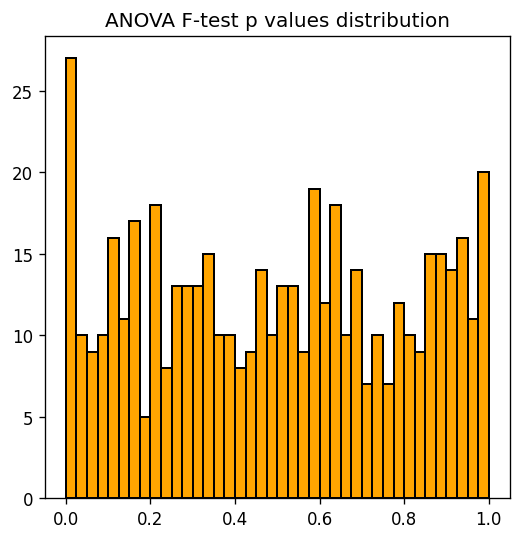

In [10]:
F_statistic_values, p_values = f_classif(X, y)

top_f_test_features = np.argsort(p_values)
bottom_f_test_features = np.argsort(p_values)[::-1]
plt.figure(dpi=120, figsize=(5,5))
plt.hist(p_values, edgecolor='black', linewidth=1.2, color="orange", bins=40)
plt.title("ANOVA F-test p values distribution")
plt.show()

In [8]:
top_f_test_features

array([  2,   3,   6,   7,   4,   8,   5,   0,   1,   9, 414, 462, 425,
       458, 351, 339, 395, 170, 180, 356, 300, 215, 140, 293, 344, 343,
       366, 336, 330, 332, 294, 237, 446, 285, 176,  41, 387, 133, 109,
       253, 158, 459, 126,  47,  76, 117,  92, 201,  86, 231, 157, 146,
       274, 163, 430, 463,  73, 325, 150,  77, 358, 355,  90,  33,  88,
        97, 263, 422, 436, 367, 209, 405, 401, 477, 226,  71, 152, 318,
       440, 183,  36, 479, 371, 186,  55, 286, 223, 460,  96, 121, 213,
       297, 281, 214, 323, 155, 220, 346, 217, 475, 262, 494, 169, 485,
       127,  93, 338,  24, 421, 206, 434, 191, 134,  64, 372, 315, 309,
        46, 198, 268, 123, 137, 287, 368, 202, 481, 444, 365, 135, 320,
       267, 173, 348, 218, 433, 397,  74,  51, 115, 399, 312, 375, 148,
       139, 101, 103, 197, 275, 498, 219, 451, 184, 353, 185,  37, 108,
       114, 232, 251, 441, 439, 471, 394, 402, 363, 200, 131, 389, 324,
        81, 249, 298, 334, 257, 171, 496, 398, 391, 246,  87, 37

## ReliefF

In [11]:
from skrebate import ReliefF

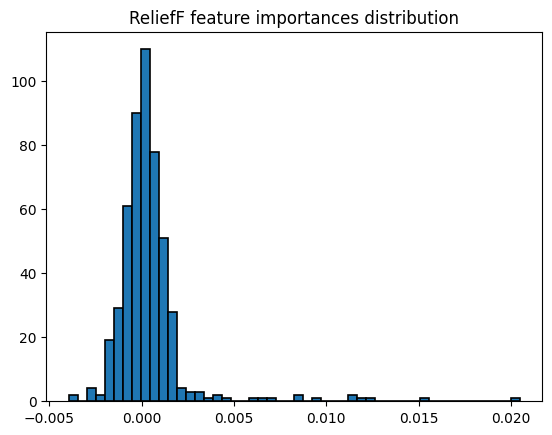

In [12]:
relief = ReliefF(n_neighbors=10, n_features_to_select=10)
relief.fit(np.array(X), y)

top_relief_features = relief.top_features_
bottom_relief_features = top_relief_features[::-1]

plt.hist(relief.feature_importances_, edgecolor='black', bins=50, linewidth=1.2)
plt.title("ReliefF feature importances distribution")
plt.show()

In [9]:
relief.top_features_

array([  2,   3,   6,   7,   4,   8,   5,   0,   1, 414,   9, 462, 425,
       354, 300, 360, 388, 322, 311, 344, 331, 343, 177, 368, 437, 466,
       279, 329, 310, 172, 320, 154, 386, 497, 323,  60, 147,  31, 121,
       146, 371,  41, 194,  48, 404, 476,  81, 133, 302, 131, 346,  50,
       362, 270, 298, 307, 306, 182, 113,  43, 324, 184,  91, 473, 389,
       339, 142, 488,  66,  11,  76, 229,  75, 192, 478, 251, 125, 211,
       482, 348,  82, 465, 283, 461, 415,  57, 190, 152, 119, 238,  58,
       313, 359, 185, 225, 493, 215, 101, 228, 241, 378, 430, 135,  25,
       447, 419, 372,  89, 260, 407, 314, 290, 107, 383, 165, 263, 457,
       216, 227, 198,  86, 266, 122, 487,  22,  47, 342, 201,  15, 271,
        42, 284,  95, 143, 434, 416, 424,  10, 223, 139,  96,  94, 112,
        18, 334, 491, 451, 398, 445, 111, 179, 358, 413, 237, 400, 220,
       235, 428, 382, 244, 137, 219, 249,  28,  68,  30, 335, 355, 103,
       446, 401, 163, 484, 485, 489, 258, 155,  59, 422, 174,  1

## Mutual Information

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
mi = mutual_info_classif(X,y)
top_mi_features = np.argsort(mi)[::-1]
bottom_mi_features = top_mi_features[::-1]

In [15]:
top_mi_features

array([  2,   6,   3,   4,   5,   8,   9,   1,   7,   0, 425, 414, 416,
        45, 462, 287,  48, 493, 100, 314, 136,  39, 386, 435, 495,  75,
       356,  34, 313, 171, 242, 443, 226, 318, 263, 471, 245, 448,  94,
       460, 409,  24, 135, 323, 405, 413, 376, 238, 387,  90, 444, 442,
       121, 484,  28, 296, 237, 342, 322, 251,  23,  26, 218, 438,  53,
       181, 241, 122, 466, 169, 203, 459, 300,  11, 310, 497, 431, 454,
       424, 125, 206,  12,  14,  40, 119, 278, 426, 333, 316, 215, 234,
       468, 337, 129,  20,  41, 499, 262, 432, 335, 230, 487, 396,  65,
       469, 156, 401, 235, 216, 261, 258, 402,  43, 212, 391, 275, 404,
       293,  88, 188, 354, 176, 319, 183, 456, 137, 247, 329, 220,  15,
       228, 477, 189, 379,  29, 106,  74,  38,  70, 428, 158, 365, 433,
        56, 277, 168, 115, 200, 117, 498, 201,  37, 434, 208,  52, 488,
       375, 359, 214,  67, 369, 276, 199, 378, 350, 291, 478,  60, 207,
       173, 355, 253, 283, 400, 113, 175, 338, 491, 320, 472, 37

In [30]:
common_bottom_n = 300

common_worst = list(
    set.intersection(
        set(bottom_f_test_features[:common_bottom_n]),
        set(bottom_mi_features[:common_bottom_n]),
        set(bottom_relief_features[:common_bottom_n])
    ))

common_worst.sort()

print(f'Common worst {common_bottom_n} variables: {len(common_worst)}')

Common worst 300 variables: 122


## MARS

Works only with Python $\leq$ 3.10, so doing it through `R`, posting the results below only <br>
`R` indices are from 1, so Python equivalent is 1 less (V3 $\rightarrow$ 2, V9 $\rightarrow$ 8 etc.) <br> <br>
*MARS was done `without` data scaling, but it should not impact the output severely*

### Including VIF-removed variables

In [ ]:
########################################
# MARS (degree = 1)
#      nsubsets   gcv    rss
# V3         13 100.0  100.0
# V9         11  27.6   32.6
# V463       10  27.4   32.0
# V5          9  25.4   29.8
# V352        8  19.4   24.6
# V255        7  17.1   22.2
# V29         5  12.7   17.5
# V486        4  10.1   14.8
# V56         3   7.2   11.9
########################################
# MARS (degree = 2)
#      nsubsets   gcv    rss
# V3         19 100.0  100.0
# V415       17  42.1   47.3
# V463       16  37.3   43.0
# V426       15  31.5   37.9
# V352       14  27.4   34.3
# V5         13  25.6   32.4
# V56        12  23.7   30.5
# V406       12  23.7   30.5
# V483       11  21.9   28.6
# V116       10  19.8   26.6
# V218        9  17.7   24.4
# V454        8  15.1   22.0
# V345        7  12.0   19.3
# V388        4   4.5   12.5
########################################

### Excluding VIF-removed variables

In [ ]:
########################################
# MARS (degree = 1)
#      nsubsets   gcv    rss
# V3         13 100.0  100.0
# V352       11  22.6   28.9
# V406       10  20.6   26.9
# V29         9  18.9   25.0
# V210        8  17.4   23.2
# V380        7  15.7   21.3
# V82         6  13.9   19.3
# V255        5  11.8   17.0
# V486        4   9.4   14.5
# V56         3   6.6   11.7
########################################
# MARS (degree = 2)
#      nsubsets   gcv    rss
# V3         22 100.0  100.0
# V23        20  32.9   41.2
# V255       20  32.9   41.2
# V444       19  30.6   39.1
# V352       18  28.9   37.4
# V454       17  27.3   35.7
# V218       16  25.7   34.1
# V29        15  24.1   32.5
# V406       15  24.1   32.5
# V82        14  22.5   30.9
# V76        13  21.0   29.3
# V349       12  19.5   27.7
# V234       11  18.0   26.1
# V443        9  14.4   22.4
# V75         7  12.3   19.6
# V61         6  10.6   17.6
# V49         4   6.7   13.4
# V339        2   6.1   10.2
########################################